In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cifar10_path = 'cifar10.npz'
cifar10_data = np.load(cifar10_path)

In [3]:
images = cifar10_data['raw']  # Raw image data
labels = cifar10_data['labels']  # Labels for the dataset

In [28]:
unique_labels = np.unique(labels)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
train_images = images.transpose(0, 2, 3, 1)  # (1000, 32, 32, 3)

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

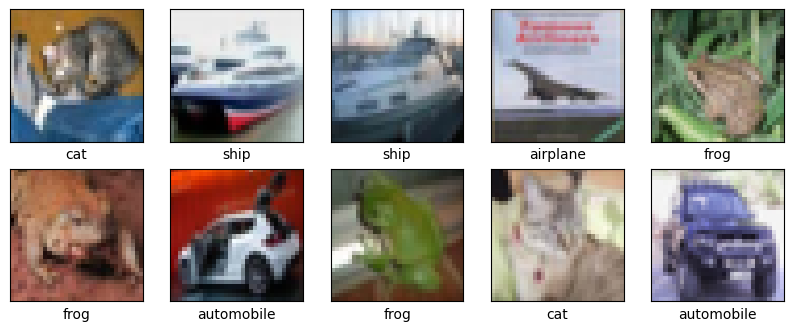

In [20]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])  # Display image
    plt.xlabel(class_names[labels[i]])  # Use the label directly
plt.show()

In [7]:
train_images_normalized = train_images / 255.0

In [31]:
# 3. Build a CNN model using TensorFlow/Keras
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [33]:
X_train, X_val, y_train, y_val = train_test_split(train_images_normalized, labels, test_size=0.2, random_state=42)

In [34]:
# 6. Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0931 - loss: 2.3006 - val_accuracy: 0.1550 - val_loss: 2.2387
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1854 - loss: 2.1768 - val_accuracy: 0.2700 - val_loss: 2.1557
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2626 - loss: 2.0667 - val_accuracy: 0.3150 - val_loss: 2.0260
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2844 - loss: 1.9324 - val_accuracy: 0.3500 - val_loss: 1.8473
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3177 - loss: 1.8480 - val_accuracy: 0.4150 - val_loss: 1.7494
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3793 - loss: 1.7516 - val_accuracy: 0.3750 - val_loss: 1.7526
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3810 - loss: 1.6782 - val_accuracy: 0.4250 - val_loss: 1.6764
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4066 - loss: 1.5759 - val_accuracy: 0.4300 - val_loss

In [35]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"\nTest accuracy: {test_acc}")


7/7 - 0s - 5ms/step - accuracy: 0.4300 - loss: 1.6630

Test accuracy: 0.4300000071525574


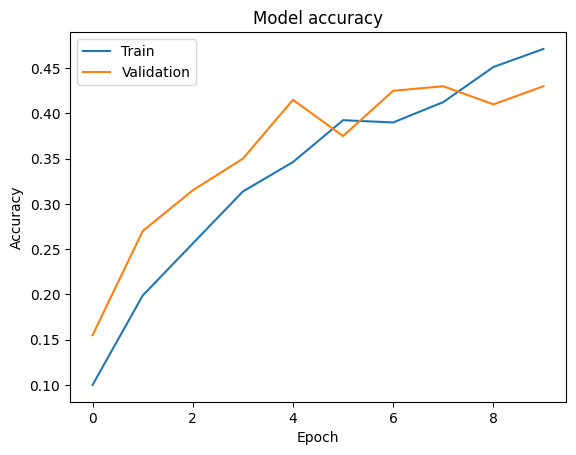

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


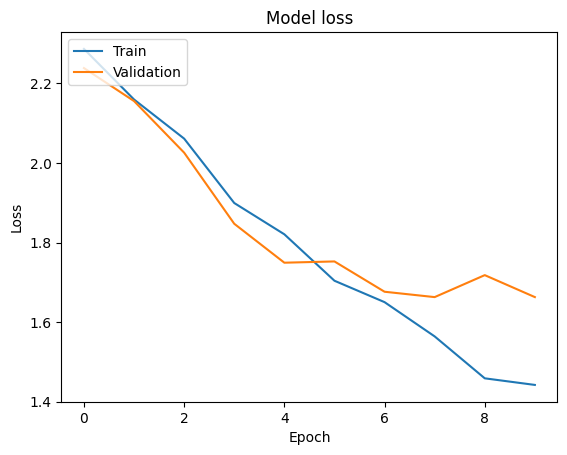

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()